In [1]:
import sys
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Add the modules directory to Python path
module_path = os.path.abspath(os.path.join('..', 'scripts'))
if module_path not in sys.path:
    sys.path.append(module_path)

#import modules
from scraper import main as run_scraper
from preprocessor import ReviewPreprocessor
from sentiment_analysis import BankReviewAnalyzer
from visualizer import BankDataVisualizer


In [2]:
print("[ Starting Scraper... ]")

# Run the main scraper function
raw_df = run_scraper()

print("\n[INFO] ------   Scraping Finished.   ------")
display(raw_df.head())

[ Starting Scraper... ]

===== Starting Google Play Store Review Scraper =====


[1/2] Fetching app information...

CBE: Commercial Bank Of Ethiopia
App ID: com.combanketh.mobilebanking
Current Rating: 4.3187156
Total Ratings: 38884
Total Reviews: 8340

BOA: Bank Of Abissinia
App ID: com.boa.boaMobileBanking
Current Rating: 4.1813955
Total Ratings: 6396
Total Reviews: 1226

DashenBank: Dashen Bank S.c.
App ID: com.dashen.dashensuperapp
Current Rating: 4.169451
Total Ratings: 3988
Total Reviews: 786

App information saved to data/raw/app_info.csv

[2/2] Scraping reviews...


Banks:   0%|          | 0/3 [00:00<?, ?it/s]

scraping reviews for: com.combanketh.mobilebanking ...
420 amount of data is scraped
Collected 420 reviews for Commercial Bank Of Ethiopia


Banks:  33%|███▎      | 1/3 [00:03<00:07,  3.68s/it]

scraping reviews for: com.boa.boaMobileBanking ...
420 amount of data is scraped
Collected 420 reviews for Bank Of Abissinia


Banks:  67%|██████▋   | 2/3 [00:07<00:03,  3.73s/it]

scraping reviews for: com.dashen.dashensuperapp ...
420 amount of data is scraped
Collected 420 reviews for Dashen Bank S.c.


Banks: 100%|██████████| 3/3 [00:11<00:00,  3.72s/it]


===== Scraping Complete! =====


Total reviews collected: 1260
Reviews per bank:
  Commercial Bank Of Ethiopia: 420
  Bank Of Abissinia: 420
  Dashen Bank S.c.: 420

Data saved to: data/raw/reviews_raw.csv

===== Sample Reviews =====

Commercial Bank Of Ethiopia:
------------------------------------------------------------

Rating: ⭐⭐⭐⭐⭐
Review: very good app...
Date: 2025-12-01 16:11:03

Rating: ⭐
Review: excellent...
Date: 2025-12-01 16:00:44

Rating: ⭐⭐⭐⭐⭐
Review: good...
Date: 2025-11-30 16:24:48

Bank Of Abissinia:
------------------------------------------------------------

Rating: ⭐⭐
Review: Make the reason we wrote visible on app transaction....
Date: 2025-12-01 09:20:30

Rating: ⭐
Review: app is note active working crash...
Date: 2025-11-30 21:57:28

Rating: ⭐⭐⭐⭐⭐
Review: 🙏👍...
Date: 2025-11-29 03:47:54

Dashen Bank S.c.:
------------------------------------------------------------

Rating: ⭐⭐⭐⭐
Review: best app...
Date: 2025-12-01 15:36:11

Rating: ⭐⭐⭐⭐⭐
Review: Great...
Da

,review_id,review_text,rating,review_date,user_name,thumbs_up,reply_content,bank_code,bank_name,app_id,source
0,e5570b8d-33a9-475b-8e5a-a2d93bbc7d4a,very good app,5,2025-12-01 16:11:03,Seyefemekhel Solomon,0,None,CBE,Commercial Bank Of Ethiopia,5.2.1,Google Play
1,d84bad39-93c9-4c60-b56c-d27b0990a377,excellent,1,2025-12-01 16:00:44,Mohammed Ahmed Abrahim,0,None,CBE,Commercial Bank Of Ethiopia,5.2.1,Google Play
2,361ac925-5bd6-4455-8efe-95394a4ba679,good,5,2025-11-30 16:24:48,Mahamed Abdireshid,0,None,CBE,Commercial Bank Of Ethiopia,None,Google Play
3,cb37b096-e071-4f0f-a8fd-067b7d71706d,CBE ይለያል።,5,2025-11-29 17:22:32,Kamil Tesfaye,0,None,CBE,Commercial Bank Of Ethiopia,5.2.1,Google Play
4,70f504ff-daed-40d9-9c89-cc49a95ef659,it's special for me,5,2025-11-29 15:54:14,Abde Semed,0,None,CBE,Commercial Bank Of Ethiopia,5.2.1,Google Play


In [3]:

preprocessor = ReviewPreprocessor()
success = preprocessor.process()

if success:
    print("\n Preprocessing finished successfully!")
    df = preprocessor.df
else:
    print(" Preprocessing failed.")

STARTING DATA PREPROCESSING
Loading raw data...
Loaded 1260 reviews

[1/6] Checking for missing data...

Missing values:
  reply_content: 1258 (99.84%)
  app_id: 289 (22.94%)

[2/6] Handling missing values...

[3/6] Normalizing dates...
Date range: 2024-09-16 to 2025-12-01

[4/6] Cleaning text...
Removed 34 reviews with empty text

[5/6] Validating ratings...
All ratings are valid (1-5)

[6/6] Preparing final output...
Final dataset: 1226 reviews

Saving processed data...
Data saved to: data/processed/reviews_processed.csv

PREPROCESSING REPORT

Original records: 1260
Records with missing critical data: 0
Empty reviews removed: 34
Invalid ratings removed: 0
Final records: 1226

Data retention rate: 97.30%
Data error rate: 2.70%
✓ Data quality: EXCELLENT (<5% errors)

Reviews per bank:
  Commercial Bank Of Ethiopia: 411
  Bank Of Abissinia: 408
  Dashen Bank S.c.: 407

Rating distribution:
  ⭐⭐⭐⭐⭐: 750 (61.2%)
  ⭐⭐⭐⭐: 92 (7.5%)
  ⭐⭐⭐: 69 (5.6%)
  ⭐⭐: 46 (3.8%)
  ⭐: 269 (21.9%)

Date ran

In [4]:
print("===== sentiment analysis started =====")
analyzer=BankReviewAnalyzer()   #initializing
analyzer.run_complete_multi_bank_analysis('./data/processed/reviews_processed.csv')  #performing compleet analysis

if analyzer:
    print("\n sentiment analysis finished successfully!")
else:
    print("\n sentiment alalysis failed.")

===== sentiment analysis started =====
Data loaded successfully: 1226 reviews
  - Bank Of Abissinia: 408 reviews
  - Commercial Bank Of Ethiopia: 411 reviews
  - Dashen Bank S.c.: 407 reviews
Preprocessing completed for combined: 1226 reviews
Preprocessing completed for Bank Of Abissinia: 408 reviews
Preprocessing completed for Commercial Bank Of Ethiopia: 411 reviews
Preprocessing completed for Dashen Bank S.c.: 407 reviews

===== ANALYZING: Bank Of Abissinia =====

===== ANALYZING: Commercial Bank Of Ethiopia =====

===== ANALYZING: Dashen Bank S.c. =====

BANK COMPARISON SUMMARY

Bank Of Abissinia:
  Reviews: 408
  Avg Rating: 3.40
  Positive: 48.8%
  Neutral: 31.6%
  Negative: 19.6%

Commercial Bank Of Ethiopia:
  Reviews: 411
  Avg Rating: 4.09
  Positive: 59.4%
  Neutral: 32.6%
  Negative: 8.0%

Dashen Bank S.c.:
  Reviews: 407
  Avg Rating: 3.97
  Positive: 66.1%
  Neutral: 21.4%
  Negative: 12.5%
Report saved: bank_reports\bank_of_abissinia_analysis.csv
Report saved: bank_repor

data visualization

Loaded 3 bank reports.

----------- VISUALS -----------


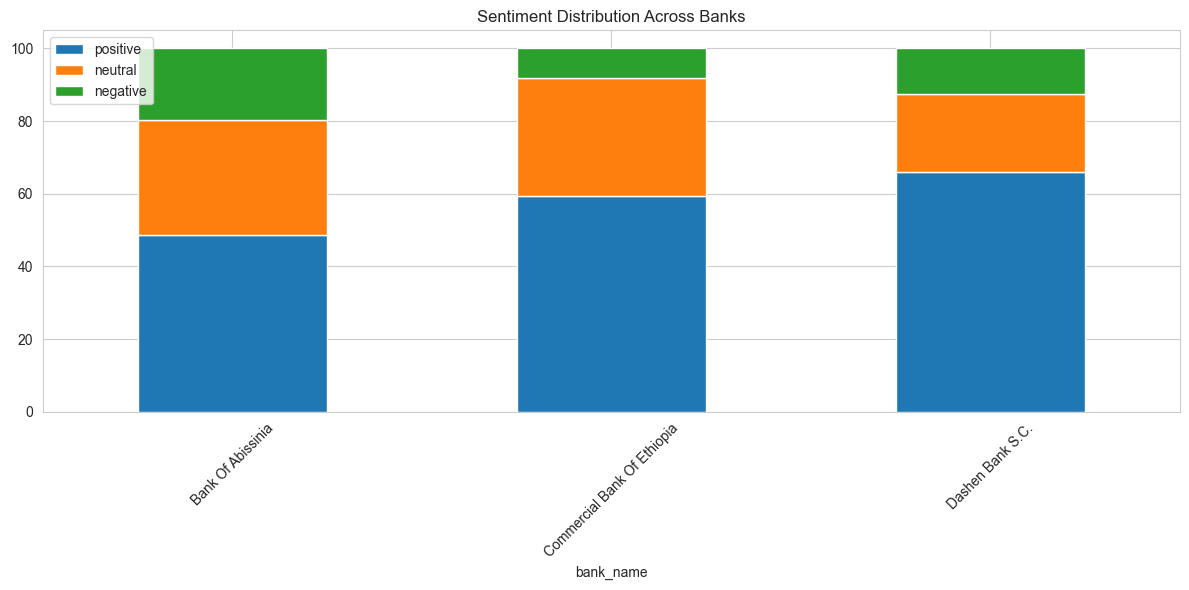

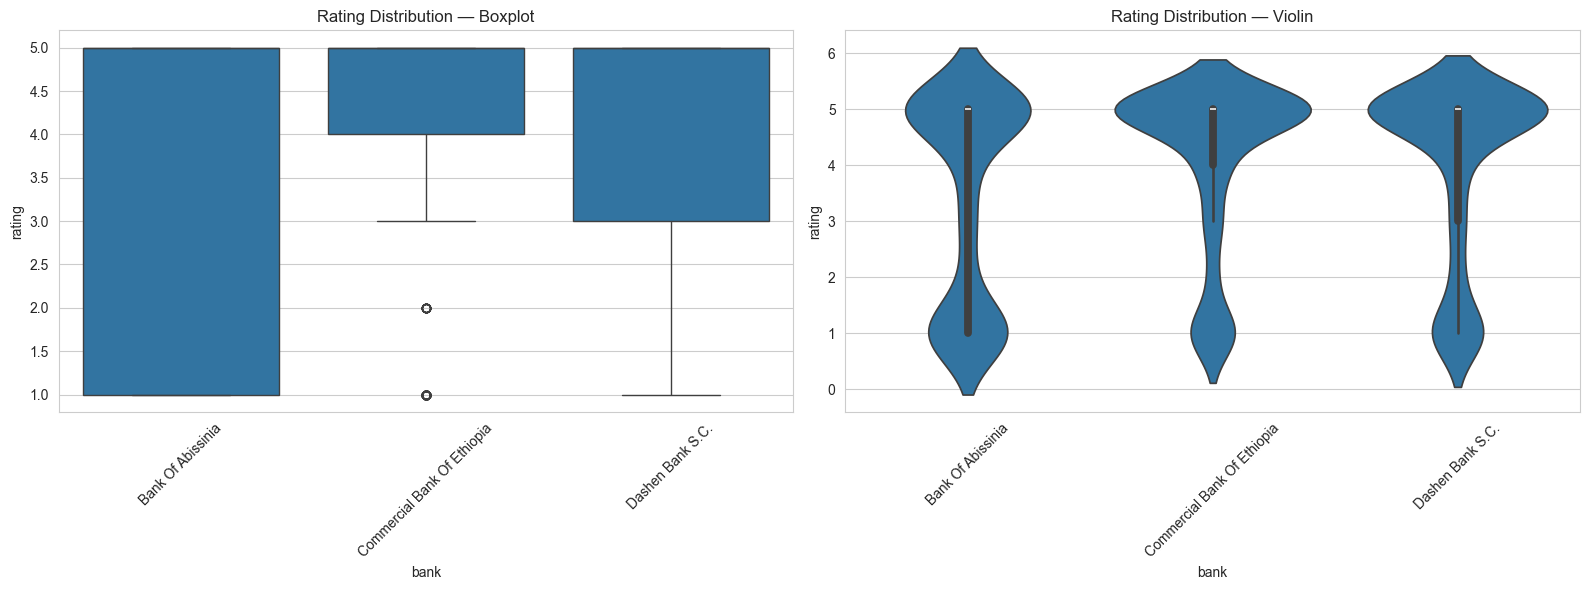

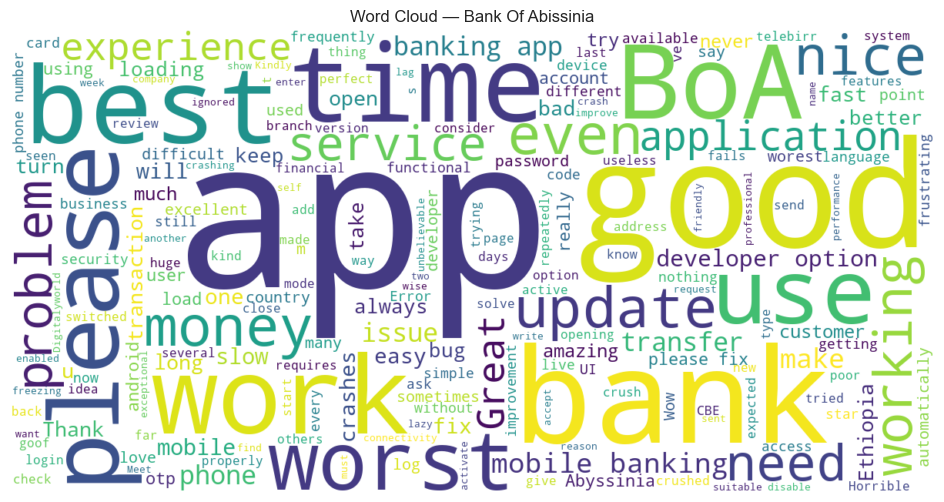

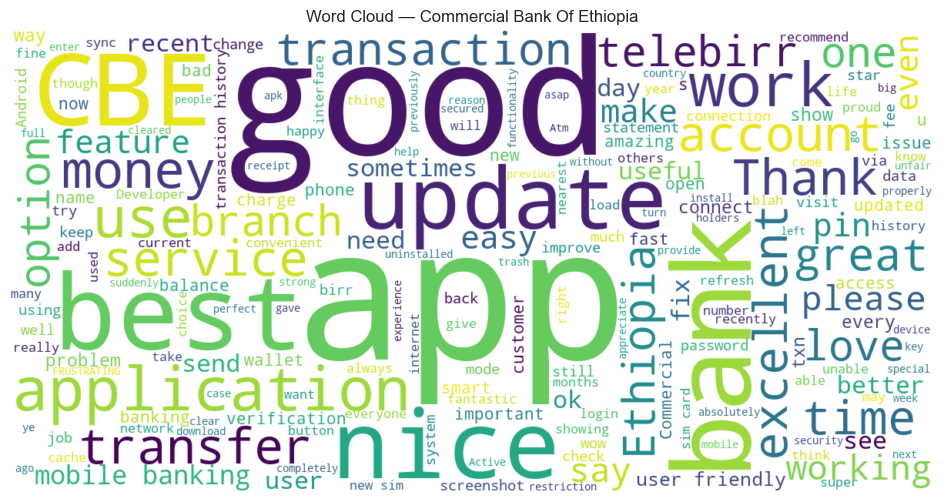

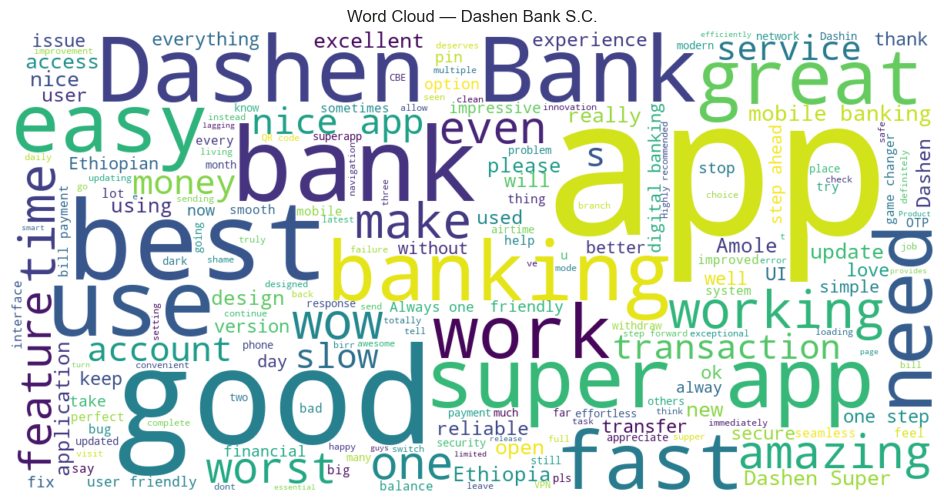


----------- ANALYTICS -----------

Drivers & Pain Points:
{'Bank Of Abissinia': {'drivers': ['Navigation & UX', 'Transactions', 'Other', 'Customer Support', 'Security'], 'painpoints': ['App Performance']}, 'Commercial Bank Of Ethiopia': {'drivers': ['Navigation & UX', 'Other', 'Transactions', 'Customer Support', 'App Performance'], 'painpoints': []}, 'Dashen Bank S.C.': {'drivers': ['Navigation & UX', 'Other', 'Security', 'Customer Support', 'Transactions'], 'painpoints': ['App Performance']}}

Recommendations:
{'Bank Of Abissinia': ['Improve app stability, remove bugs, optimize loading time.'], 'Commercial Bank Of Ethiopia': [], 'Dashen Bank S.C.': ['Improve app stability, remove bugs, optimize loading time.']}

Pairwise Comparisons:
{'Bank Of Abissinia vs Commercial Bank Of Ethiopia': {'bank1': 'Bank Of Abissinia', 'bank2': 'Commercial Bank Of Ethiopia', 'bank1_drivers': ['Navigation & UX', 'Transactions', 'Other', 'Customer Support', 'Security'], 'bank2_drivers': ['Navigation & UX'

In [5]:
#visualization 

viz = BankDataVisualizer("bank_reports")
viz.run_all()

database configuration,insertion and fetching

In [6]:

module_path = os.path.abspath(os.path.join('..', 'config'))
if module_path not in sys.path:
    sys.path.append(module_path)

import psycopg2 
from psycopg2.extras import execute_values
import pandas as pd
from config import DB_CONFIG_

In [7]:
DB_CONFIG={
    'host':DB_CONFIG_['DB_HOST'],
    'database':DB_CONFIG_['DB_NAME'],
    'user':DB_CONFIG_['DB_USER'],
    'password':DB_CONFIG_['DB_PASSWORD'],
    'port':DB_CONFIG_['DB_PORT']
}

df_bank_data=pd.read_csv("./data/raw/app_info.csv")
CSV_DIR="./bank_reports"

In [8]:
try:
    conn=psycopg2.connect(**DB_CONFIG)
    cur=conn.cursor()
    print("database connected successfully")
except Exception as e:
    print("error connecting to database")

database connected successfully


In [9]:
print(f"loaded {len(df_bank_data)} bank data")
#insert data to db
if conn and cur:
    for _,row in df_bank_data.iterrows():
        try:
            cur.execute(
                """insert into banks (bank_name,app_name)
                 VALUES (%s, %s)
                ON CONFLICT (bank_name) DO NOTHING""",
                (row['bank_name'],row['title'])
            )
        except Exception as e:
            print(f"error inserting data")
    conn.commit()
    print("data inserted successfully!")

loaded 3 bank data
data inserted successfully!


In [10]:
# # Get bank mapping from database
if conn and cur:
    cur.execute("SELECT bank_id, bank_name FROM banks")
    bank_mapping = {row[1]: row[0] for row in cur.fetchall()}
    
    print("Bank mapping (bank_name -> bank_id):")
    for bank_name, bank_id in bank_mapping.items():
        print(f"  {bank_name}: {bank_id}")


Bank mapping (bank_name -> bank_id):
  Commercial Bank Of Ethiopia: 1
  Bank Of Abissinia: 2
  Dashen Bank S.c.: 3


In [11]:
# Get bank mapping
cur.execute("SELECT bank_id, bank_name FROM banks")
bank_mapping = {str(bank_name).strip(): bank_id for bank_id, bank_name in cur.fetchall()}

In [12]:
import glob
# Get CSV files
csv_files = glob.glob(os.path.join(CSV_DIR, "*.csv"))
total_inserted = 0

for csv_file in csv_files:
    df = pd.read_csv(csv_file)
    bank_name = str(df['bank_name'].iloc[0]).strip()
    
    # Find bank_id (case-insensitive)
    bank_id = bank_mapping.get(bank_name)
    if not bank_id:
        for db_name, db_id in bank_mapping.items():
            if db_name.lower() == bank_name.lower():
                bank_id = db_id
                break
    
    if not bank_id:
        print(f"Skipping {csv_file}: Bank '{bank_name}' not found in database")
        continue
    
    # Prepare data
    insert_data = []
    for _, row in df.iterrows():
        insert_data.append((
            row['review_id'],
            bank_id,
            str(row['review_text']),
            row['review_date'],
            str(row.get('sentiment_label', 'neutral')),
            float(row.get('sentiment_score', 0.0)),
            str(row.get('source', 'bank_reports'))
        ))
    
    # Insert data
    if insert_data:
        execute_values(
            cur,
            """
            INSERT INTO reviews (
                review_id, bank_id, review_text, review_date, 
                sentiment_label, sentiment_score, source_
            ) VALUES %s
            ON CONFLICT (review_id) DO NOTHING
            """,
            insert_data
        )
        
        inserted = cur.rowcount
        total_inserted += inserted
        conn.commit()
        
        print(f"Inserted {inserted} reviews for {bank_name}")

print(f"\nTotal reviews inserted: {total_inserted}")

cur.close()
conn.close()

Inserted 8 reviews for Bank Of Abissinia
Inserted 11 reviews for Commercial Bank Of Ethiopia
Inserted 7 reviews for Dashen Bank S.c.

Total reviews inserted: 26


In [16]:
# Connect to PostgreSQL

conn = psycopg2.connect(
    host='localhost',
    database ='bank_reviews',
    user='postgres',
    password='1234',
    port='5432'
)
if conn:
    print(f"database conected successfully")

database conected successfully


In [17]:
#displaying results

def run_query(sql):
    return pd.read_sql(sql,conn)

sql="select * from banks"

run_query(sql)



C:\Users\Acer\AppData\Local\Temp\ipykernel_10960\1792701257.py:4: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  return pd.read_sql(sql,conn)


,bank_id,bank_name,app_name
0,1,Commercial Bank Of Ethiopia,Commercial Bank of Ethiopia
1,2,Bank Of Abissinia,BoA Mobile
2,3,Dashen Bank S.c.,Dashen Bank
